In [5]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

def residual_linear_fit(x, cov):
    '''
    :param x:     1D vector of i.i.d data samples [nSample]
    :param cov:   2D vector of covariates [nCov, nSample]
    :return:      residual of X after all covariates are fitted to it and subtracted from it
    '''

    coeffX = linalg.lstsq(cov.T, x)[0]
    return x - coeffX.dot(cov)

In [25]:
cc0 = []
cc1 = []

for nTest in range(1000):
    t = np.random.normal(0, 1, 100)
    
    x = 0.1*t + 0.9*np.random.normal(0, 1, 100)
    y = 0.1*t + 0.9*np.random.normal(0, 1, 100)
    z = 0.1*t + 0.9*np.random.normal(0, 1, 100)
    cc0 += [np.corrcoef(x, y)[0, 1]]
    
    xp = residual_linear_fit(x, np.array([z]))
    yp = residual_linear_fit(y, np.array([z]))
    cc1 += [np.corrcoef(xp, yp)[0, 1]]

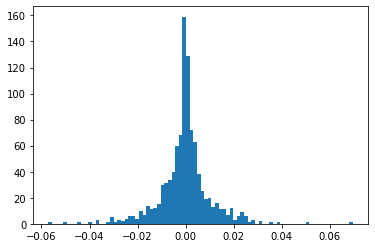

In [26]:
diff = np.array(cc0)-np.array(cc1)

plt.figure()
plt.hist(diff, bins='auto')
plt.show()